<a href="https://colab.research.google.com/github/sugam24/Coding-Neural-Networks-from-scratch/blob/main/5.%20CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.3 MB/s eta 0:00:00


In [6]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import torchmetrics

In [11]:
batch_size = 60
train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.26MB/s]


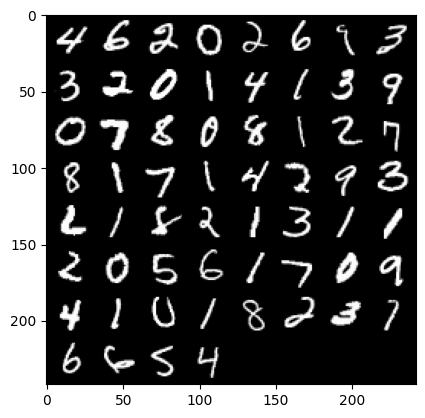

In [20]:
def imshow(img):
  npimg = img.numpy() #Converting pytorch tensor to numpy array as matplotlib only plot numpy array
  #Image processing libraries(PIL, OpenCV) and matplotlib use [H, W, C] but Pytorch use [C, H, W] = [0, 1, 2]
  #Converting Pytorch requirements to matplotlib requirements
  plt.imshow(np.transpose(npimg,(1,2,0)))

#get some random training images
dataiter = iter(train_loader) #create iterator
images, labels = next(dataiter) #get one batch

# What make_grid() does:
# Takes the batch of images: [60, 1, 28, 28]
# Arranges them in a grid layout
# Returns a single tensor with all images combined
# Output shape changes to [C, H_total, W_total]
imshow(torchvision.utils.make_grid(images))

In [33]:
#Defining CNN architecture
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    """
    Building blocks of convolutional neural network.

    Parameters:
      * in_channels: Number of channels in the input image (for grayscale images, 1)
      * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
    """
    super(CNN, self).__init__()

    # 1st convolutional layer
    self.conv1 = nn.Conv2d(in_channels = in_channels, out_channels = 8, kernel_size = 3, padding = 1)
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    # 2nd convolutional layer
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
    # Fully connected layer
    self.fc1 = nn.Linear(16*7*7, num_classes)

  def forward(self,x):
    """
    Define the forward pass of the neural network.

    Parameters:
        x: Input tensor.

    Returns:
        torch.Tensor
            The output tensor after passing through the network.
    """
    x = F.relu(self.conv1(x)) # Apply first convolution and ReLU activation
    x = self.pool(x)          # Apply max pooling
    x = F.relu(self.conv2(x)) # Apply second convolution and ReLU activation
    x = self.pool(x)          # Apply max pooling
    x = x.view(x.size(0), -1)  # Keep batch dimension, flatten the rest
    x = self.fc1(x)           # Apply fully connected layer
    return x
    x = x.view(x.size(0), -1)  # Keep batch dimension, flatten the rest
    x = self.fc1(x)           # Apply fully connected layer
    return x

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [35]:
#Define the loss function
criterion = nn.CrossEntropyLoss()

#Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [36]:
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 1000/1000 [00:24<00:00, 41.06it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:23<00:00, 42.61it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:23<00:00, 43.44it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:22<00:00, 45.39it/s]


Epoch [5/10]


100%|██████████| 1000/1000 [00:22<00:00, 44.41it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.64it/s]


Epoch [7/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.56it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.99it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:21<00:00, 45.60it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:22<00:00, 43.99it/s]


In [55]:
# Initialize all metrics before the loop
acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
precision = torchmetrics.Precision(task="multiclass", num_classes=10, average='macro')
recall = torchmetrics.Recall(task="multiclass", num_classes=10, average='macro')

# Iterate over the dataset batches
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        # Move data to device (important for GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Get predicted probabilities for test data batch
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Update all metrics (move predictions to CPU for metrics calculation)
        acc.update(preds.cpu(), labels.cpu())
        precision.update(preds.cpu(), labels.cpu())
        recall.update(preds.cpu(), labels.cpu())

# Compute all metrics
test_accuracy = acc.compute()
test_precision = precision.compute()
test_recall = recall.compute()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Reset metrics to use them again
acc.reset()
precision.reset()
recall.reset()

Test Accuracy: 0.9872
Test Precision: 0.9870
Test Recall: 0.9872


In [45]:
# Save the model
torch.save(model.state_dict(), 'MulticlassCNN.pth')

# Create a new model
loaded_model = CNN(in_channels=1, num_classes=10)

# Load the saved model
loaded_model.load_state_dict(torch.load('MulticlassCNN.pth'))

# Print the model architecture (this is correct)
print(loaded_model)

# If you want to print just the structure, you can also use:
print("\nModel Architecture:")
print("==================")
print(f"conv1: Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))")
print(f"pool: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)")
print(f"conv2: Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))")
print(f"fc1: Linear(in_features=784, out_features=10, bias=True)")

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

Model Architecture:
conv1: Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
pool: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2: Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
fc1: Linear(in_features=784, out_features=10, bias=True)


Sample 1: True=1, Pred=1,  Confidence=99.1% ✓
Sample 2: True=4, Pred=4,  Confidence=100.0% ✓
Sample 3: True=9, Pred=9,  Confidence=100.0% ✓
Sample 4: True=0, Pred=0,  Confidence=100.0% ✓
Sample 5: True=3, Pred=3,  Confidence=100.0% ✓
Sample 6: True=8, Pred=8,  Confidence=100.0% ✓
Sample 7: True=3, Pred=3,  Confidence=100.0% ✓
Sample 8: True=8, Pred=8,  Confidence=100.0% ✓
Sample 9: True=6, Pred=6,  Confidence=100.0% ✓
Sample 10: True=0, Pred=0,  Confidence=100.0% ✓


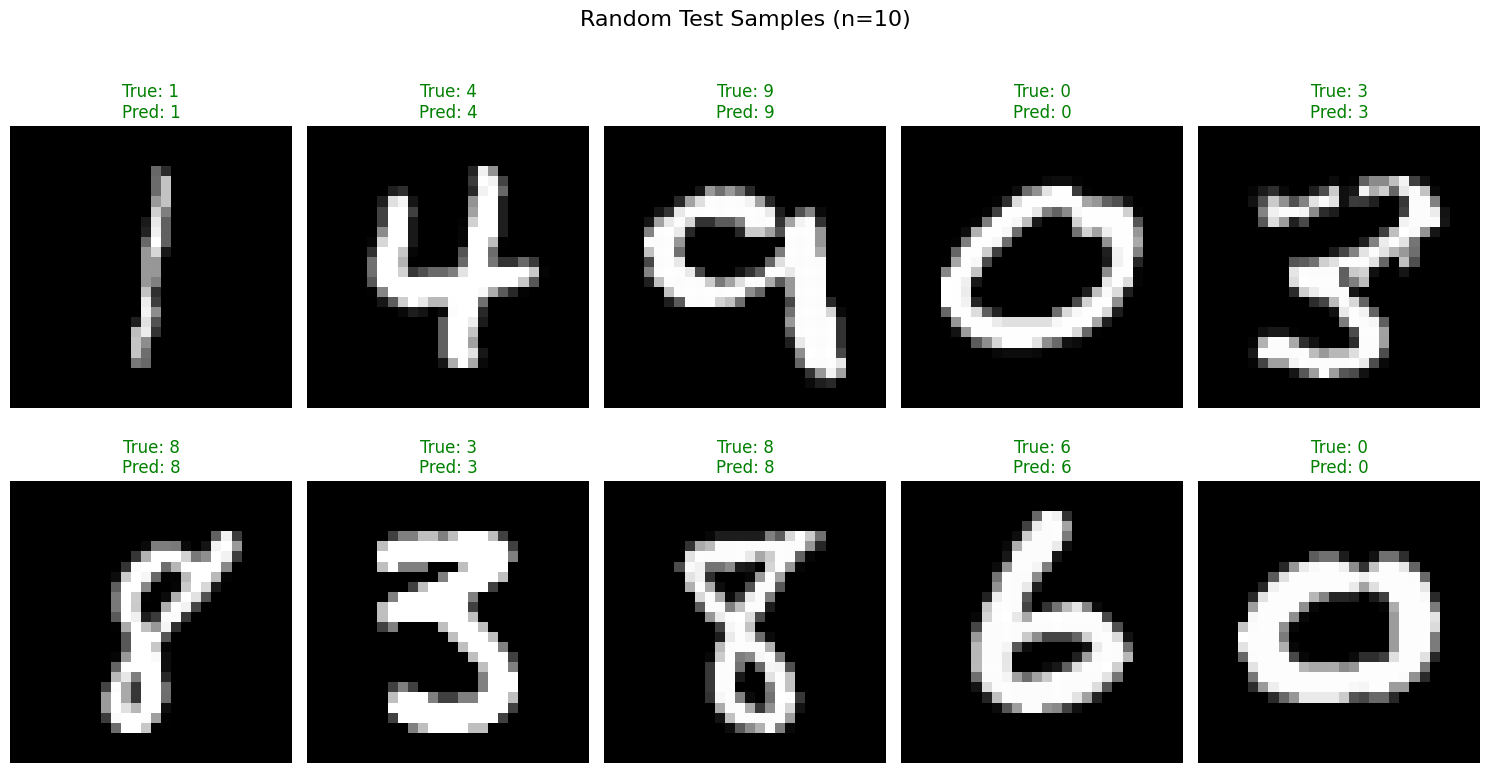

In [50]:
# Function to test on random samples from test dataset
def test_random_samples(num_samples=10):
    """
    Test model on random samples from the test dataset.

    Args:
        num_samples: Number of random samples to test
    """
    # Get random indices
    indices = torch.randperm(len(test_dataset))[:num_samples]

    plt.figure(figsize=(15, 8))

    for i, idx in enumerate(indices):
        # Get the sample
        image, true_label = test_dataset[idx]

        # Get prediction
        with torch.no_grad():
            output = model(image.unsqueeze(0).to(device))
            probs = torch.softmax(output, dim=1)
            _, prediction = torch.max(output, 1)
            prediction = prediction.cpu().item()

        # Plot
        plt.subplot(2, 5, i+1)
        plt.imshow(image.squeeze(), cmap='gray')

        # Color code
        color = 'green' if prediction == true_label else 'red'

        plt.title(f'True: {true_label}\nPred: {prediction}', color=color)
        plt.axis('off')

        # Print information
        print(f"Sample {i+1}: True={true_label}, Pred={prediction}, ",
              f"Confidence={probs[0][prediction].item()*100:.1f}%",
              f"✓" if prediction == true_label else "✗")

    plt.suptitle(f'Random Test Samples (n={num_samples})', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Test on random samples
test_random_samples(10)